In [ ]:
#https://www.kaggle.com/andrewmvd/cyberbullying-classification?select=cyberbullying_tweets.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Imports

In [ ]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split

%matplotlib inline

#NLTK package for NLP
!pip install nltk

#import the nltk package
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize,sent_tokenize

#Packages for data cleaning
!pip install contractions
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import download as nltk_download
import random
import contractions
import numpy as np
import re

#Modeling 
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
!pip install hyperopt
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from numpy import asarray
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn import linear_model, svm, datasets, metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score

!pip install catboost
from catboost import CatBoostClassifier

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 106 kB 3.3 MB/s 
     |████████████████████████████████| 284 kB 24.7 MB/s 
     |████████████████████████████████| 76.1 MB 44 kB/s 


In [ ]:
#data = pd.read_csv("/content/drive/MyDrive/Ensemble Learning_CyberBullies/cyberbullying_tweets.csv")
#data = pd.read_csv(r"C:\Users\Aashima\T2\Ensemble\Project_CyberBullies\cyberbullying_tweets.csv\cyberbullying_tweets.csv")
data = pd.read_csv('cyberbullying_tweets.csv')

In [ ]:
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying


#Feature Engineering

In [ ]:
#Number of Characters
data['char_count'] = data.apply(lambda x: len(x['tweet_text']), axis=1)

In [ ]:
#Number of words
def word_count(df):
  return(len(df.split()))

data['word_count'] = data.apply(lambda x: word_count(x['tweet_text']), axis=1)

In [ ]:
#Number of Capital Characters
def capital_chars(text):
    temp=0
    for i in text:
        if i.isupper():
            temp+=1
    return temp

data['capital_char_count'] = data.apply(lambda x: capital_chars(x['tweet_text']), axis=1)


In [ ]:
##Number of capital words

def count_capital_words(text):
    return sum(map(str.isupper,text.split()))

data['capital_word_count'] = data.apply(lambda x: count_capital_words(x['tweet_text']), axis=1)

In [ ]:
#Count of punctuations
import string

def count_punctuation(df):
    punctuations= string.punctuation
    dict_=dict()
    for i in punctuations:
        dict_[str(i)+' count']= df.count(i)
    return sum(1 for v in dict_.values() if v != 0)

data['punctuation_count'] = data.apply(lambda x: count_punctuation(x['tweet_text']), axis = 1)

In [ ]:
#Number of words in quotes

def count_words_in_quotes(text):
  x = re.findall("'.'",text)
  count=0
  if x is None: return 0
  else:
      for i in x:
          t=i[1:-1]
          count+= word_count(t)
      return count


data['count_words_in_quotes'] = data.apply(lambda x: count_words_in_quotes(x['tweet_text']), axis = 1)

In [ ]:
#Number of sentences
#Not the best logic for counting the sentences, can be improved

data['Number_of_sentences'] = data.apply(lambda x: (x['tweet_text'].count(". ")+1), axis =1)

In [ ]:
#Count of unique words
def count_unique_words(text):
    return len(set(text.split()))

data['Unique_words'] = data.apply(lambda x: count_unique_words(x['tweet_text']), axis = 1)


In [ ]:
#Count of Hashtags
from collections import Counter
import re

def hashtag(df):
  lst = [df]
  hash_counts = Counter(re.findall(r'#([a-z0-9]+)', ' '.join(lst), re.I))
  return sum(hash_counts.values())

data['Hashtags'] = data.apply(lambda x: hashtag(x['tweet_text']), axis = 1)


In [ ]:
#Count of mentions
def count_mentions(df):
  lst = [df]
  mention_counts = Counter(re.findall(r'@([a-z0-9]+)', ' '.join(lst), re.I))
  return sum(mention_counts.values())

data['number_of_mentions'] = data.apply(lambda x: count_mentions(x['tweet_text']), axis = 1)

In [ ]:
#Count of stop words
import nltk
nltk.download('stopwords')

def stopwords_count(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)


data['Number_of_stopwords'] = data.apply(lambda x: stopwords_count(x['tweet_text']), axis = 1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Average sentence length, Unique words%age, Stopwords as a percentage of total words

data['avg_sentlength'] = data['word_count']/data['Number_of_sentences']
data['unique_vs_words'] = data['Unique_words']/data['word_count']
data['stopwords_vs_words'] = data['Number_of_stopwords']/data['word_count']

In [ ]:
data.head(20)

,tweet_text,cyberbullying_type,char_count,word_count,capital_char_count,capital_word_count,punctuation_count,count_words_in_quotes,Number_of_sentences,Unique_words,Hashtags,number_of_mentions,Number_of_stopwords,avg_sentlength,unique_vs_words,stopwords_vs_words
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,61,9,1,0,3,0,1,9,2,0,3,9.0,1.000000,0.333333
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying,115,14,12,1,2,0,1,14,10,0,2,14.0,1.000000,0.142857
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,60,9,3,0,2,0,1,9,0,1,2,9.0,1.000000,0.222222
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying,103,18,3,1,5,0,2,18,0,1,8,9.0,1.000000,0.444444
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying,103,18,10,1,3,0,2,17,0,1,8,9.0,0.944444,0.444444
5,"@Raja5aab @Quickieleaks Yes, the test of god is that good or bad or indifferent or weird or whatever, it all proves gods existence.",not_cyberbullying,131,23,3,0,3,0,1,20,0,2,10,23.0,0.869565,0.434783
6,Itu sekolah ya bukan tempat bully! Ga jauh kaya neraka,not_cyberbullying,54,10,2,0,1,0,1,10,0,0,0,10.0,1.000000,0.000000
7,Karma. I hope it bites Kat on the butt. She is just nasty. #mkr,not_cyberbullying,63,14,4,1,2,0,4,14,1,0,5,3.5,1.000000,0.357143
8,@stockputout everything but mostly my priest,not_cyberbullying,44,6,0,0,1,0,1,6,0,1,2,6.0,1.000000,0.333333
9,Rebecca Black Drops Out of School Due to Bullying:,not_cyberbullying,50,9,7,0,1,0,1,9,0,0,2,9.0,1.000000,0.222222


In [ ]:
data.columns

Index(['tweet_text', 'cyberbullying_type', 'char_count', 'word_count',
       'capital_char_count', 'capital_word_count', 'punctuation_count',
       'count_words_in_quotes', 'Number_of_sentences', 'Unique_words',
       'Hashtags', 'number_of_mentions', 'Number_of_stopwords',
       'avg_sentlength', 'unique_vs_words', 'stopwords_vs_words'],
      dtype='object')

In [ ]:
#Drop duplicates
data = data.drop_duplicates(subset=['tweet_text'])

#Text Cleaning

In [ ]:
#ADJUSTING DATA

#Putting all tweets in a lower case format
data['tweet_text_clean'] = data['tweet_text'].str.lower()

#Removing numbers and punctuations
data['tweet_text_clean'] = data['tweet_text_clean'].apply(lambda x: re.sub(r'[!@#$(),\n"%^*?:;~`0-9]', ' ', x))
data['tweet_text_clean'] = data['tweet_text_clean'].apply(lambda x: re.sub(r'[[]]', ' ', x))


In [ ]:
# downloading stopwords list
nltk_download('stopwords')
stop = stopwords.words('english')

#Removing the contractions
data['tweet_clean_stopword_removed'] = data['tweet_text_clean'].apply(lambda x: contractions.fix(x))

#Replacing stop words
pat = r'\b(?:{})\b'.format('|'.join(stop))
data['tweet_clean_stopword_removed'] = data['tweet_clean_stopword_removed'].str.replace(pat, '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Lemmatize the sentence

def lemmatizeSentence(sentence):
    lemmatizer = WordNetLemmatizer()
    token_words=word_tokenize(sentence) 
#we need to tokenize the sentence or else lemmatizing will return the entire sentence as is.
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(lemmatizer.lemmatize(word,pos="v"))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

In [ ]:
data['tweet_clean_stopword_removed'] = data['tweet_clean_stopword_removed'].apply(lambda x: lemmatizeSentence(x))

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def stemming(sentence):
  ps = PorterStemmer()
  token_words = word_tokenize(sentence)
  stem_sentence=[]
    
  for word in token_words:
    stem_sentence.append(ps.stem(word))
    stem_sentence.append(" ")
  
  return "".join(stem_sentence)

In [ ]:
data['tweet_clean_stopword_removed_Stemmed'] = data['tweet_clean_stopword_removed'].apply(lambda x: stemming(x))

In [ ]:
data.to_parquet('data.gzip.parquet',compression='gzip')

#Data Exploration and visualisation

Exploring words and patterns associated with each type of cyberbullying.

In [ ]:
data['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [ ]:
def black_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return ("hsl(0,100%,1%)")
    #hsl(211, 91%, 57%) - for blueish shade

def word_cloud(data,Name):
  from wordcloud import WordCloud
  plt.figure(figsize=(18,9))
  temp1 = data[data['cyberbullying_type']== Name]
  text = temp1.tweet_text_clean.values
  cloud=WordCloud(collocations=False,width=1000,height=500,background_color = 'white').generate(" ".join(text))
  plt.axis('off')
  plt.title(Name,fontsize=30)
  return(plt.imshow(cloud.recolor(color_func= black_color_func, random_state=3),interpolation='bilInear'))

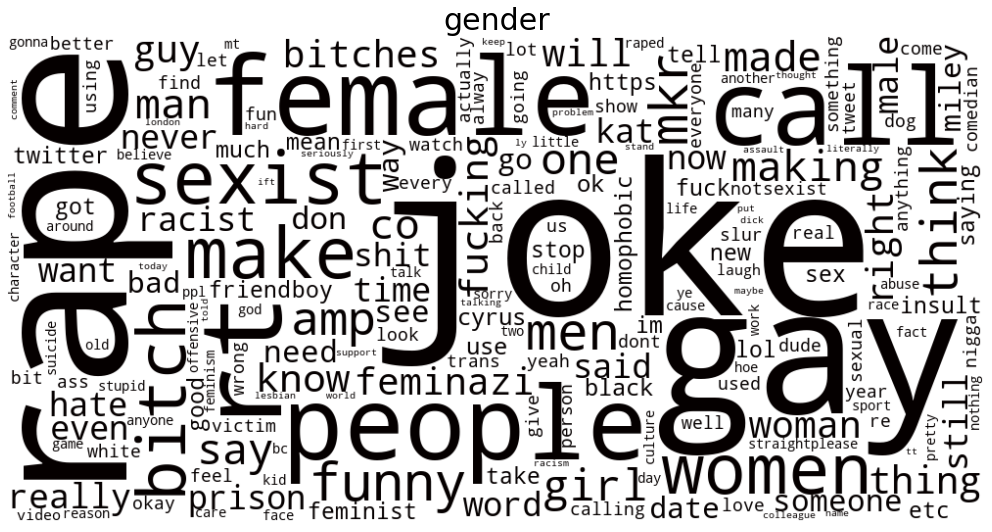

In [ ]:
word_cloud(data,'gender')

In [ ]:
#Bigrams - can be a good feature in model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def top_n_gram(corpus,ngram_range,n=None):
    vector = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    words = vector.transform(corpus)
    freq_words = words.sum(axis=0) 
    words_freq = [(word, freq_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

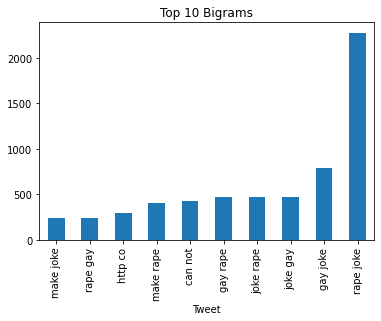

In [ ]:
text_gender = data[data['cyberbullying_type']=='gender'].tweet_clean_stopword_removed.values
bigrams = top_n_gram(text_gender,(2,2),10)

gender2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
gender2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

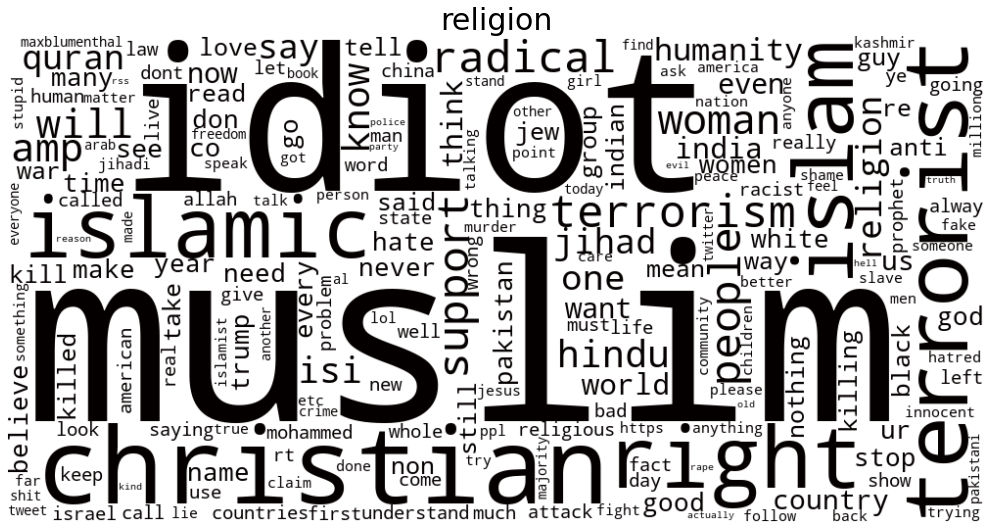

In [ ]:
#EDA for the religion
word_cloud(data,'religion')

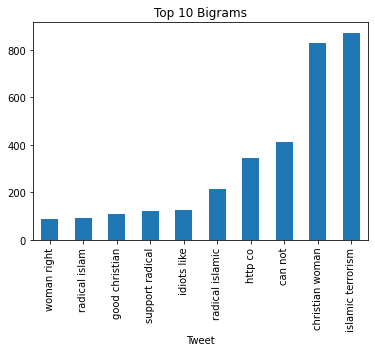

In [ ]:
text_religion = data[data['cyberbullying_type']=='religion'].tweet_clean_stopword_removed.values
bigrams = top_n_gram(text_religion,(2,2),10)

religion2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
religion2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

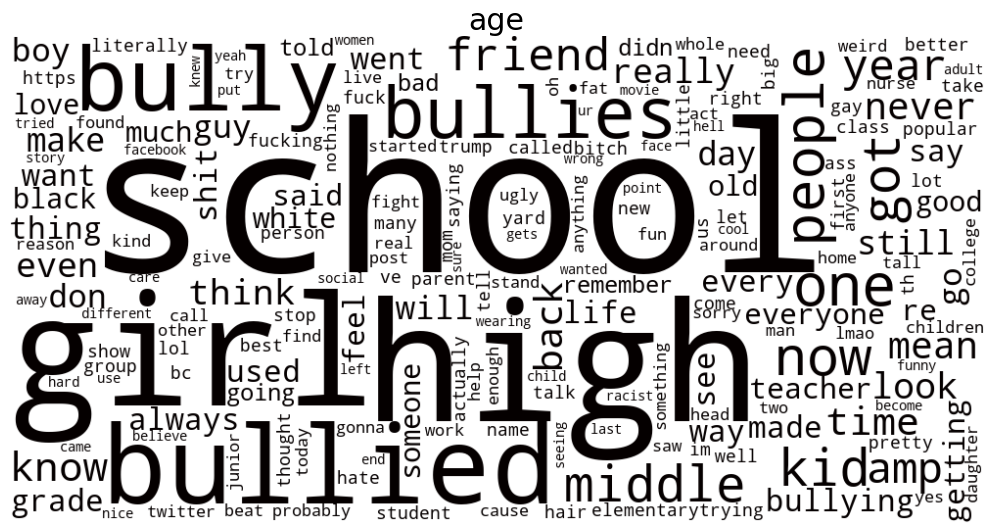

In [ ]:
#EDA for the age
word_cloud(data,'age')

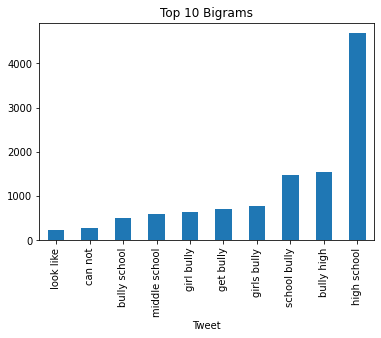

In [ ]:
text_age = data[data['cyberbullying_type']=='age'].tweet_clean_stopword_removed.values
bigrams = top_n_gram(text_age,(2,2),10)

age2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
age2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

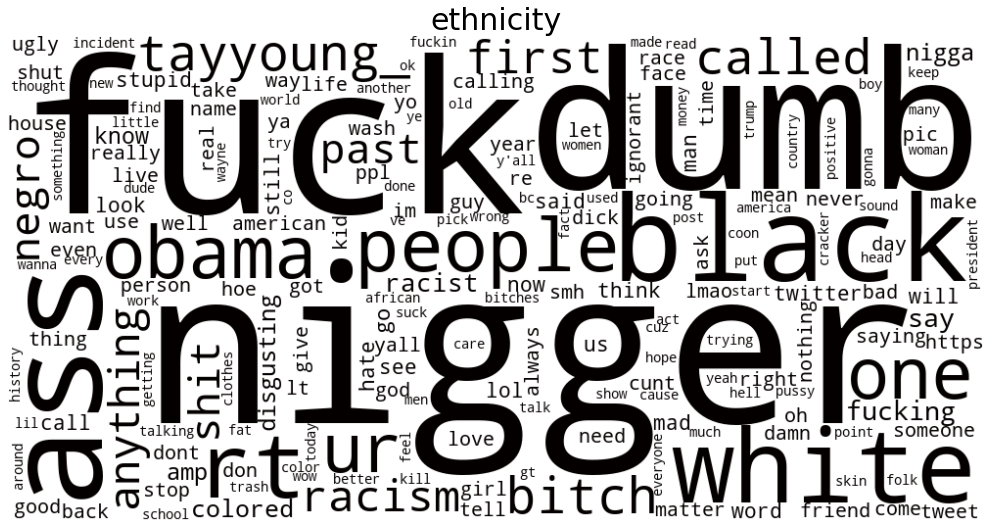

In [ ]:
#EDA for 'ethnicity'
word_cloud(data,'ethnicity')

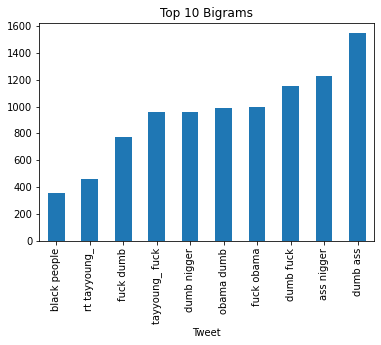

In [ ]:
text_ethnicity = data[data['cyberbullying_type']=='ethnicity'].tweet_clean_stopword_removed.values
bigrams = top_n_gram(text_ethnicity,(2,2),10)

ethnicity2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
ethnicity2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

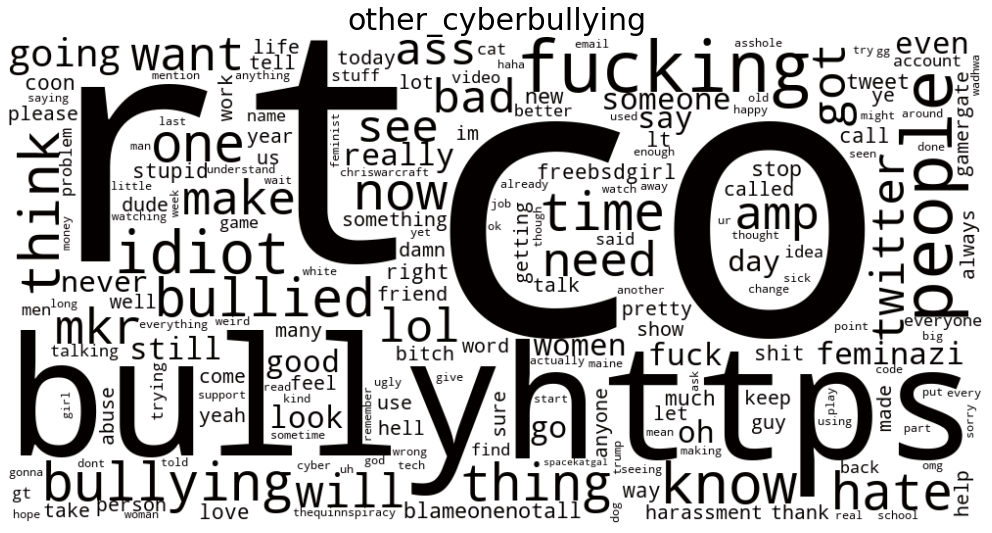

In [ ]:
#EDA for 'other_cyberbullying'
word_cloud(data,'other_cyberbullying')

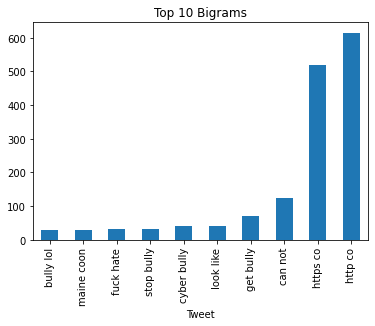

In [ ]:
text_other_cyber = data[data['cyberbullying_type']=='other_cyberbullying'].tweet_clean_stopword_removed.values
bigrams = top_n_gram(text_other_cyber,(2,2),10)

ethnicity2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
ethnicity2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

#Feature Extraction and Modelling
Different techniques used here like Bag of words and Word2vec. 

In [ ]:
#Label Encoding the target variable

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data['target'] = labelencoder.fit_transform(data['cyberbullying_type'])

## Bag-of-Words

### 1. CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(lowercase=True)
count_vectorizer.fit(data.tweet_clean_stopword_removed_Stemmed)

CountVectorizer()

In [ ]:
X = count_vectorizer.transform(data.tweet_clean_stopword_removed_Stemmed)

In [ ]:
import scipy.sparse
from scipy.sparse import csr_matrix

In [ ]:
X = scipy.sparse.hstack((X,np.array(data["char_count"],data["word_count"])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['capital_char_count'],data['capital_word_count'])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['count_words_in_quotes'],data['Number_of_sentences'])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['Unique_words'],data['Hashtags'])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['number_of_mentions'],data['Number_of_stopwords'])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['avg_sentlength'],data['unique_vs_words'])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['stopwords_vs_words'])[:,None]))


In [ ]:
y = data.cyberbullying_type.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=555)

print(f"X train data has shape {X_train.shape} and their label's shape {y_train.shape}")
print(f"X test data has shape {X_test.shape} and their label's shape {y_test.shape}")

X train data has shape (36813, 49613) and their label's shape (36813,)
X test data has shape (9204, 49613) and their label's shape (9204,)


#### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=555)

In [ ]:
# with original text with count_vectorizer
#from sklearn.metrics import f1_score
#y_pred = rf.predict(X_test)
#print('F1_score : %f' %(f1_score(y_pred, y_test, average = 'micro')))

F1_score : 0.844741


In [ ]:
# with clean text with count_vectorizer - Removed stopwords and stemming and lemmatisation too

y_pred = rf.predict(X_test)
print('F1_score : %f' %(f1_score(y_pred, y_test, average = 'micro')))


F1_score : 0.853759


In [ ]:
#Clean Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

                age       0.97      0.98      0.97      1645
other_cyberbullying       0.99      0.98      0.99      1562
           religion       0.90      0.84      0.87      1518
          ethnicity       0.64      0.69      0.66      1583
  not_cyberbullying       0.64      0.63      0.63      1273
             gender       0.96      0.96      0.96      1623

           accuracy                           0.85      9204
          macro avg       0.85      0.85      0.85      9204
       weighted avg       0.86      0.85      0.85      9204



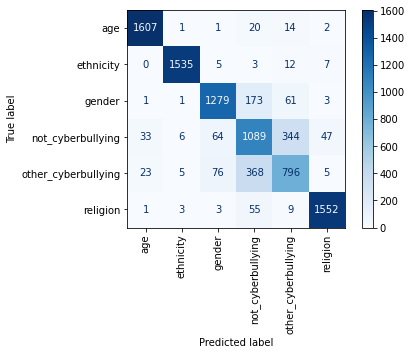

In [ ]:
#Clean Text
plot_confusion_matrix(estimator=rf, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer_clean = CountVectorizer(lowercase=True)
count_vectorizer_clean.fit(data.tweet_clean_stopword_removed_Stemmed)

CountVectorizer()

In [ ]:
X_clean_CV = count_vectorizer_clean.transform(data.tweet_clean_stopword_removed_Stemmed)
y_clean_CV = data.cyberbullying_type.values
X_clean_train_CV, X_clean_test_CV, y_clean_train_CV, y_clean_test_CV = train_test_split(X_clean_CV, y_clean_CV, test_size=.2, random_state=555)

print(f"X train data has shape {X_clean_train_CV.shape} and their label's shape {y_clean_train_CV.shape}")
print(f"X test data has shape {X_clean_test_CV.shape} and their label's shape {y_clean_test_CV.shape}")

X train data has shape (36813, 49606) and their label's shape (36813,)
X test data has shape (9204, 49606) and their label's shape (9204,)


In [ ]:
import scipy.sparse
from scipy.sparse import csr_matrix

In [ ]:
X_clean_CV_fearure = count_vectorizer_clean.transform(data.tweet_text_clean)
#X = count_vectorizer.transform(data.tweet_clean_stopword_removed_Stemmed)

import scipy.sparse
from scipy.sparse import csr_matrix

X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV,np.array(data["char_count"],data["word_count"])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['capital_char_count'],data['capital_word_count'])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['count_words_in_quotes'],data['Number_of_sentences'])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['Unique_words'],data['Hashtags'])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['number_of_mentions'],data['Number_of_stopwords'])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['avg_sentlength'],data['unique_vs_words'])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['stopwords_vs_words'])[:,None]))

In [ ]:
X_clean_train_CV_feature, X_clean_test_CV_feature, y_clean_train_CV_feature, y_clean_test_CV_feature = train_test_split(X_clean_CV_fearure, y_clean_CV, test_size=.2, random_state=555)

print(f"X train data has shape {X_clean_train_CV_feature.shape} and their label's shape {y_clean_train_CV_feature.shape}")
print(f"X test data has shape {X_clean_test_CV_feature.shape} and their label's shape {y_clean_test_CV_feature.shape}")

X train data has shape (36813, 49613) and their label's shape (36813,)
X test data has shape (9204, 49613) and their label's shape (9204,)


In [ ]:
import pickle
def train_CV(model_n, model, X_train, y_train, X_test, y_test):

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  f1 = f1_score(y_pred, y_test, average = 'micro')
  print(model_n)
  print('F1_score ((Using CountVectonizer of words technique)) : %f' %(f1))
  print('Accuracy_score of ((Using Bag of words technique)) : %f'  %(accuracy_score(y_test, y_pred)))

  print('\n------------------------------------------')
  print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))
  plot_confusion_matrix(estimator=model, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

  pickle.dump(model,open("/content/drive/MyDrive/Colab Notebooks/20_Ensemble_Learning/Project/models/" + model_n +".pkl",'wb'))

#### Decision Trees

DecisionTree
F1_score ((Using CountVectonizer of words technique)) : 0.829857
Accuracy_score of ((Using Bag of words technique)) : 0.829857

------------------------------------------
                     precision    recall  f1-score   support

  not_cyberbullying       0.98      0.97      0.98      1645
             gender       0.98      0.98      0.98      1562
           religion       0.88      0.83      0.86      1518
other_cyberbullying       0.59      0.62      0.60      1583
          ethnicity       0.57      0.60      0.58      1273
                age       0.94      0.93      0.94      1623

           accuracy                           0.83      9204
          macro avg       0.82      0.82      0.82      9204
       weighted avg       0.83      0.83      0.83      9204



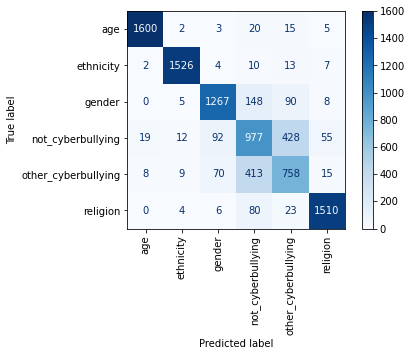

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

train_CV("DecisionTree", dt, X_clean_train_CV_feature, y_clean_train_CV_feature, X_clean_test_CV_feature, y_clean_test_CV_feature)

#### Gradient Boosting


GradientBoosting_CV
F1_score ((Using CountVectonizer of words technique)) : 0.851152
Accuracy_score of ((Using Bag of words technique)) : 0.851152

------------------------------------------
                     precision    recall  f1-score   support

  not_cyberbullying       0.98      0.97      0.98      1645
             gender       0.99      0.98      0.99      1562
           religion       0.92      0.83      0.87      1518
other_cyberbullying       0.61      0.72      0.66      1583
          ethnicity       0.63      0.60      0.62      1273
                age       0.97      0.94      0.96      1623

           accuracy                           0.85      9204
          macro avg       0.85      0.84      0.85      9204
       weighted avg       0.86      0.85      0.85      9204



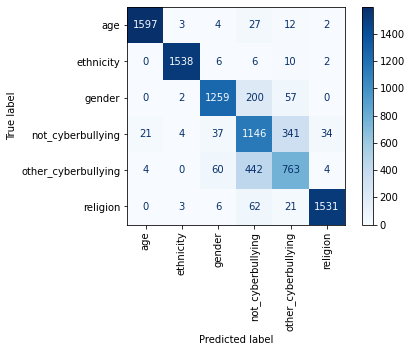

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)


train_CV("GradientBoosting_CV", gb, X_clean_train_CV_feature, y_clean_train_CV_feature, X_clean_test_CV_feature, y_clean_test_CV_feature)

#### Light GBM

In [ ]:
X_clean_train_CV_LGBM =X_clean_train_CV_feature.astype('float32')
#y_train_CV_LGBM = y_train_CV.astype('float32')
X_clean_test_CV_LGBM = X_clean_test_CV_feature.astype('float32')
#y_test_CV_LGBM = y_test_CV.astype('float32')

LightGBM
F1_score ((Using CountVectonizer of words technique)) : 0.862886
Accuracy_score of ((Using Bag of words technique)) : 0.862886

------------------------------------------
                     precision    recall  f1-score   support

  not_cyberbullying       0.99      0.97      0.98      1645
             gender       0.99      0.99      0.99      1562
           religion       0.91      0.85      0.88      1518
other_cyberbullying       0.65      0.70      0.67      1583
          ethnicity       0.65      0.67      0.66      1273
                age       0.97      0.95      0.96      1623

           accuracy                           0.86      9204
          macro avg       0.86      0.86      0.86      9204
       weighted avg       0.87      0.86      0.87      9204



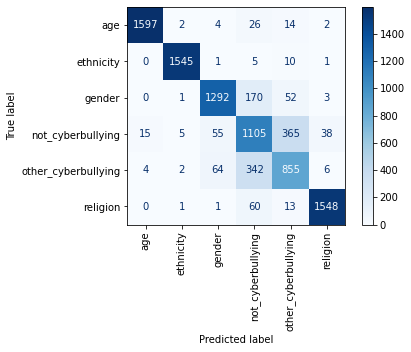

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)

train_CV("LightGBM", lgb, X_clean_train_CV_LGBM, y_clean_train_CV, X_clean_test_CV_LGBM, y_clean_test_CV)

#### XGBoost

In [ ]:
model = XGBClassifier(objective = 'multi:softmax')

# fit the model on the whole dataset
xgboost_model = model.fit(X_train, y_train)

#Predict
y_pred = xgboost_model.predict(X_test)

In [ ]:
#Original  Text
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of XGBoost((Using Bag of words technique)) : %f' %(f1_score(y_pred, y_test, average = 'micro')))
print('Accuracy_score of XGBoost((Using Bag of words technique)) : %f'  %(accuracy_score(y_test, y_pred)))

F1_score of XGBoost((Using Bag of words technique)) : 0.837027
Accuracy_score of XGBoost((Using Bag of words technique)) : 0.837027


In [ ]:
#Original Text
print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

                age       0.99      0.97      0.98      1645
other_cyberbullying       1.00      0.98      0.99      1562
           religion       0.94      0.78      0.85      1518
          ethnicity       0.56      0.77      0.65      1583
  not_cyberbullying       0.63      0.53      0.57      1273
             gender       0.98      0.93      0.95      1623

           accuracy                           0.84      9204
          macro avg       0.85      0.83      0.83      9204
       weighted avg       0.86      0.84      0.84      9204



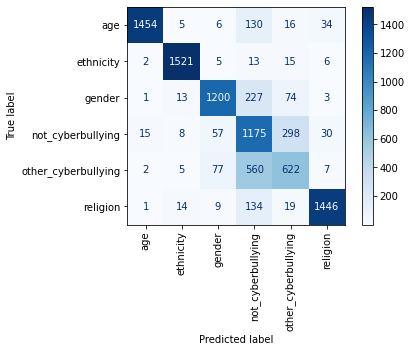

In [ ]:
#Original Text
plot_confusion_matrix(estimator=rf, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
#Try using the feature scaling
# Feature Scaling
# Tried this feature scaling but no improvmenet in the accuracy so leaving out this step.
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler(with_mean=False)
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

In [ ]:
model = XGBClassifier(objective = 'multi:softmax')

# make predictions using xgboost for classification
# fit the model on the whole dataset
xgboost_model = model.fit(X_train, y_train)

#Predict
y_pred = xgboost_model.predict(X_test)

[11:15:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
print('F1_score of XGBoost((Using Bag of words technique)) : %f' %(f1_score(y_pred, y_test, average = 'micro')))

F1_score of XGBoost((Using Bag of words technique)) : 0.861691


In [ ]:
#Clean Text
print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

          ethnicity       0.99      0.97      0.98      1645
other_cyberbullying       0.99      0.98      0.99      1562
                age       0.93      0.79      0.85      1518
             gender       0.56      0.75      0.64      1583
           religion       0.60      0.51      0.56      1273
  not_cyberbullying       0.98      0.93      0.95      1623

           accuracy                           0.83      9204
          macro avg       0.84      0.82      0.83      9204
       weighted avg       0.85      0.83      0.84      9204



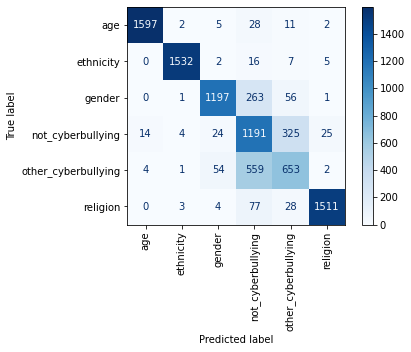

In [ ]:
#Clean Text
plot_confusion_matrix(estimator=xgboost_model , X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

#### Adaboost

In [ ]:
#Clean text
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(learning_rate=1)
adaboost_model = model.fit(X_train, y_train)

#Predict
y_pred = adaboost_model.predict(X_test)

In [ ]:
#Clean Text
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of AdaBoost((Using Bag of words technique)) : %f' %(f1_score(y_pred, y_test, average = 'micro')))
print('Accuracy_score of AdaBoost((Using Bag of words technique)) : %f'  %(accuracy_score(y_test, y_pred)))

F1_score of AdaBoost((Using Bag of words technique)) : 0.787810
Accuracy_score of AdaBoost((Using Bag of words technique)) : 0.787810


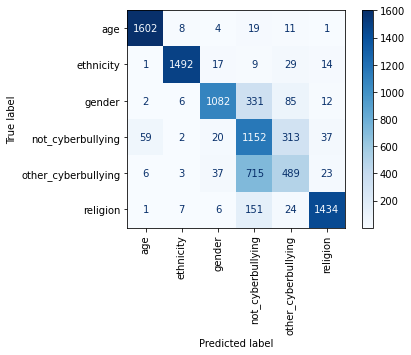

In [ ]:
#Clean_Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=adaboost_model, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
#Clean Text
print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.96      0.97      0.97      1645
           religion       0.98      0.96      0.97      1562
  not_cyberbullying       0.93      0.71      0.81      1518
          ethnicity       0.48      0.73      0.58      1583
             gender       0.51      0.38      0.44      1273
                age       0.94      0.88      0.91      1623

           accuracy                           0.79      9204
          macro avg       0.80      0.77      0.78      9204
       weighted avg       0.81      0.79      0.79      9204



#### CatBoost

In [ ]:
#Catboost
!pip install catboost
from catboost import CatBoostClassifier

model = CatBoostClassifier()
catboost_model = model.fit(X_train, y_train)

#Predict
y_pred = catboost_model.predict(X_test)

In [ ]:
#Clean Text

print('F1_score of CatBoost((Using Bag of words technique)) : %f' %(f1_score(y_pred, y_test, average = 'micro')))
print('Accuracy_score of CatBoost((Using Bag of words technique)) : %f'  %(accuracy_score(y_test, y_pred)))

F1_score of CatBoost((Using Bag of words technique)) : 0.860278
Accuracy_score of CatBoost((Using Bag of words technique)) : 0.860278


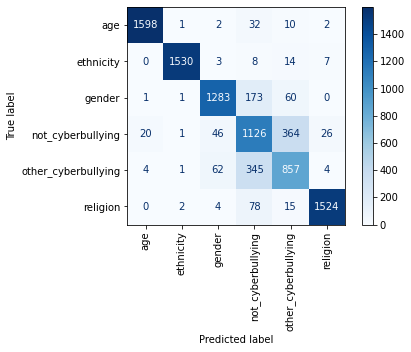

In [ ]:
#Clean_Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=catboost_model, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.98      0.97      0.98      1645
           religion       1.00      0.98      0.99      1562
  not_cyberbullying       0.92      0.85      0.88      1518
          ethnicity       0.64      0.71      0.67      1583
             gender       0.65      0.67      0.66      1273
                age       0.98      0.94      0.96      1623

           accuracy                           0.86      9204
          macro avg       0.86      0.85      0.86      9204
       weighted avg       0.87      0.86      0.86      9204



### 2. TF-IDF

In [ ]:
import sklearn.feature_extraction.text

In [ ]:
tfidf = sklearn.feature_extraction.text.TfidfVectorizer(tokenizer=word_tokenize, min_df=.0005, max_df=.8)

In [ ]:
# with original text
X_tfidf = tfidf.fit_transform(data.tweet_clean_stopword_removed_Stemmed).toarray()
y_tfidf = data.cyberbullying_type.values

# # with cleaned text
# X = tfidf.fit_transform(data.tweet_text_clean).toarray()
# y = data.cyberbullying_type.values

# # with cleaned text & label-encoded target
# X = tfidf.fit_transform(data.tweet_text_clean).toarray()
# y = data.target.values

In [ ]:
X_tfidf = pd.DataFrame(X_tfidf)

In [ ]:
#Adding New Features
X_tfidf['char_count']= data[["char_count"]]
X_tfidf['word_count']= data[["word_count"]]
X_tfidf['capital_char_count']= data[["capital_char_count"]]
X_tfidf['capital_word_count']= data[["capital_word_count"]]
X_tfidf['count_words_in_quotes']= data[["count_words_in_quotes"]]
X_tfidf['Number_of_sentences']= data[["Number_of_sentences"]]
X_tfidf['Unique_words']= data[["Unique_words"]]
X_tfidf['Hashtags']= data[["Hashtags"]]
X_tfidf['number_of_mentions']= data[["number_of_mentions"]]
X_tfidf['Number_of_stopwords']= data[["Number_of_stopwords"]]
X_tfidf['unique_vs_words']= data[["unique_vs_words"]]
X_tfidf['stopwords_vs_words']= data[["stopwords_vs_words"]]


In [ ]:
X_tfidf = X_tfidf.fillna(0)

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_tfidf, y_tfidf, test_size=.2, random_state=555)

print(f"X train data has shape {X_train_2.shape} and their label's shape {y_train_2.shape}")
print(f"X test data has shape {X_test_2.shape} and their label's shape {y_test_2.shape}")

X train data has shape (36813, 2610) and their label's shape (36813,)
X test data has shape (9204, 2610) and their label's shape (9204,)


####Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train_2, y_train_2)

RandomForestClassifier(random_state=555)

In [ ]:
y_pred = rf.predict(X_test_2)
print('F1_score : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))

F1_score : 0.869187


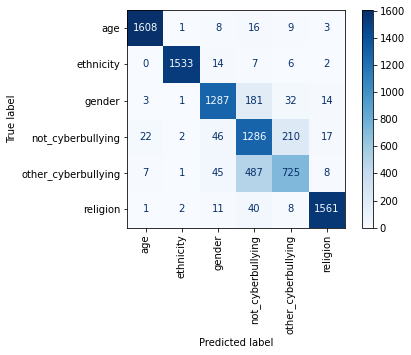

In [ ]:
plot_confusion_matrix(estimator=rf, X= X_test_2, y_true=y_test_2, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_2, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.98      0.98      0.98      1645
  not_cyberbullying       1.00      0.98      0.99      1562
                age       0.91      0.85      0.88      1518
           religion       0.64      0.81      0.71      1583
          ethnicity       0.73      0.57      0.64      1273
             gender       0.97      0.96      0.97      1623

           accuracy                           0.87      9204
          macro avg       0.87      0.86      0.86      9204
       weighted avg       0.88      0.87      0.87      9204



In [ ]:
#with cleaned text > TF-IDF
# from sklearn.metrics import f1_score
# y_pred = rf.predict(X_test)
# print('F1_score : %f' %(f1_score(y_pred, y_test, average = 'micro')))

F1_score : 0.825558


In [ ]:
#with cleaned text & labeled target > TF-IDF
# from sklearn.metrics import f1_score
# y_pred = rf.predict(X_test)
# print('F1_score : %f' %(f1_score(y_pred, y_test, average = 'micro')))


F1_score : 0.825558


In [ ]:
def train_TF(model_n, model, X_train, y_train, X_test, y_test):

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  f1 = f1_score(y_pred, y_test,average = 'micro')
  print(model_n)
  print('F1_score ((Using TF-IDF technique)) : %f' %(f1))
  print('Accuracy_score of ((Using TF-IDF technique)) : %f'  %(accuracy_score(y_test, y_pred)))

  print('\n------------------------------------------')
  print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))
  plot_confusion_matrix(estimator=model, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

  pickle.dump(model,open("/content/drive/MyDrive/Colab Notebooks/20_Ensemble_Learning/Project/models/" + model_n +".pkl",'wb'))
 

####Decision Tree

DecisionTree_TF
F1_score ((Using TF-IDF technique)) : 0.836701
Accuracy_score of ((Using TF-IDF technique)) : 0.836701

------------------------------------------
                     precision    recall  f1-score   support

other_cyberbullying       0.98      0.96      0.97      1645
                age       0.98      0.97      0.97      1562
           religion       0.86      0.82      0.84      1518
             gender       0.63      0.67      0.65      1583
  not_cyberbullying       0.61      0.62      0.61      1273
          ethnicity       0.94      0.93      0.94      1623

           accuracy                           0.84      9204
          macro avg       0.83      0.83      0.83      9204
       weighted avg       0.84      0.84      0.84      9204



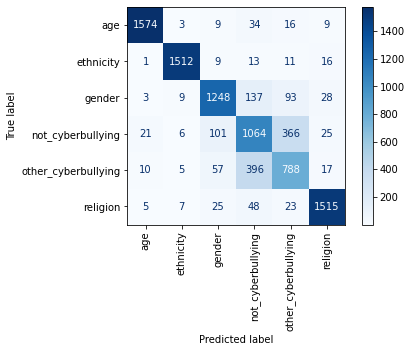

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

train_TF("DecisionTree_TF", dt, X_train_2, y_train_2, X_test_2, y_test_2)

####GradientBoosting

GradientBoosting_TF
F1_score ((Using TF-IDF technique)) : 0.866037
Accuracy_score of ((Using TF-IDF technique)) : 0.866037

------------------------------------------
                     precision    recall  f1-score   support

other_cyberbullying       0.99      0.97      0.98      1645
                age       0.99      0.98      0.99      1562
           religion       0.93      0.84      0.88      1518
             gender       0.62      0.84      0.71      1583
  not_cyberbullying       0.74      0.53      0.62      1273
          ethnicity       0.96      0.96      0.96      1623

           accuracy                           0.87      9204
          macro avg       0.87      0.85      0.86      9204
       weighted avg       0.88      0.87      0.87      9204



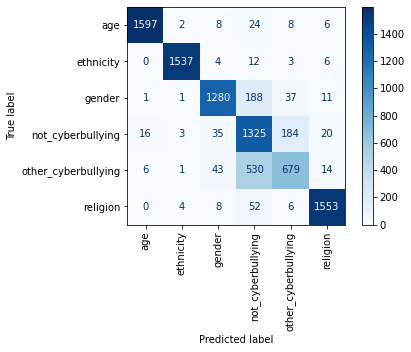

In [ ]:
gb = GradientBoostingClassifier(random_state=42)


train_TF("GradientBoosting_TF", gb, X_train_2, y_train_2, X_test_2, y_test_2)

####LightGBM

In [ ]:
X_clean_train_TF_LGBM =X_train_2.astype('float32')
X_clean_test_TF_LGBM = X_test_2.astype('float32')


LightGBM
F1_score ((Using TF-IDF technique)) : 0.879074
Accuracy_score of ((Using TF-IDF technique)) : 0.879074

------------------------------------------
                     precision    recall  f1-score   support

  not_cyberbullying       0.99      0.97      0.98      1645
             gender       1.00      0.99      0.99      1562
           religion       0.92      0.87      0.90      1518
other_cyberbullying       0.67      0.78      0.72      1583
          ethnicity       0.71      0.64      0.67      1273
                age       0.97      0.97      0.97      1623

           accuracy                           0.88      9204
          macro avg       0.88      0.87      0.87      9204
       weighted avg       0.88      0.88      0.88      9204



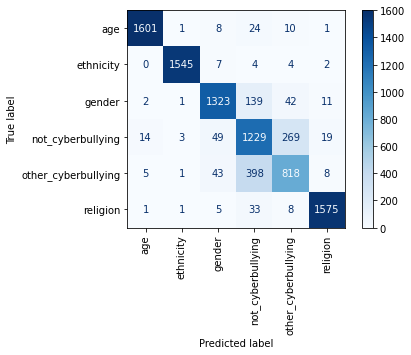

In [ ]:
#from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)

train_TF("LightGBM", lgb, X_clean_train_TF_LGBM, y_train_2, X_clean_test_TF_LGBM, y_test_2)

#### XGBoost

In [ ]:
model = XGBClassifier(objective = 'multi:softmax')

xgboost_model = model.fit(X_train_2, y_train_2)

#Predict
y_pred = xgboost_model.predict(X_test_2)

In [ ]:
print('F1_score of XGBoost((Using TF-IDF)) : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))

F1_score of XGBoost((Using TF-IDF)) : 0.857997


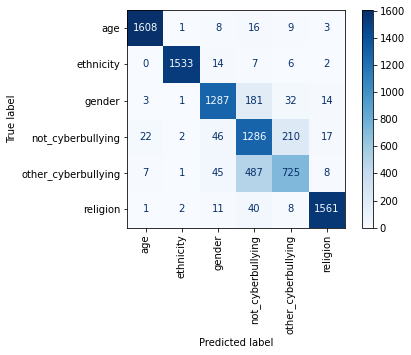

In [ ]:
plot_confusion_matrix(estimator=rf, X= X_test_2, y_true=y_test_2, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_2, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.98      0.97      0.98      1645
  not_cyberbullying       1.00      0.98      0.99      1562
                age       0.92      0.83      0.87      1518
           religion       0.60      0.88      0.71      1583
          ethnicity       0.76      0.46      0.57      1273
             gender       0.97      0.95      0.96      1623

           accuracy                           0.86      9204
          macro avg       0.87      0.84      0.85      9204
       weighted avg       0.88      0.86      0.86      9204



#### Adaboost

In [ ]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(learning_rate=1)
adaboost_model = model.fit(X_train_2, y_train_2)

#Predict
y_pred = adaboost_model.predict(X_test_2)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of AdaBoost((Using TF-IDF)) : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))
print('Accuracy_score of AdaBoost((Using TF-IDF)) : %f'  %(accuracy_score(y_test_2, y_pred)))

F1_score of AdaBoost((Using TF-IDF)) : 0.813451
Accuracy_score of AdaBoost((Using TF-IDF)) : 0.813451


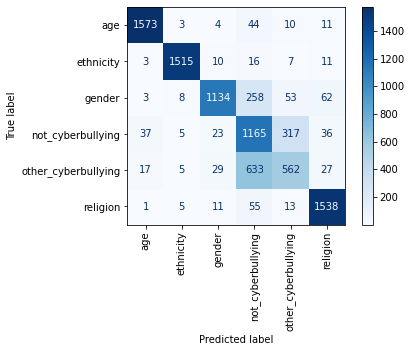

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=adaboost_model, X= X_test_2, y_true=y_test_2, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_2, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.96      0.96      0.96      1645
  not_cyberbullying       0.98      0.97      0.98      1562
                age       0.94      0.75      0.83      1518
           religion       0.54      0.74      0.62      1583
          ethnicity       0.58      0.44      0.50      1273
             gender       0.91      0.95      0.93      1623

           accuracy                           0.81      9204
          macro avg       0.82      0.80      0.80      9204
       weighted avg       0.83      0.81      0.81      9204



####Catboost

In [ ]:
model = CatBoostClassifier()
catboost_model = model.fit(X_train_2, y_train_2)

#Predict
y_pred = catboost_model.predict(X_test_2)

Learning rate set to 0.095102
0:	learn: 1.5682851	total: 6.97s	remaining: 1h 56m 8s
1:	learn: 1.4280369	total: 10.3s	remaining: 1h 25m 16s
2:	learn: 1.3214212	total: 13.5s	remaining: 1h 14m 49s
3:	learn: 1.2344379	total: 16s	remaining: 1h 6m 28s
4:	learn: 1.1639418	total: 18.3s	remaining: 1h 36s
5:	learn: 1.1049044	total: 20.9s	remaining: 57m 50s
6:	learn: 1.0513018	total: 23.3s	remaining: 55m 3s
7:	learn: 1.0076703	total: 25.8s	remaining: 53m 24s
8:	learn: 0.9705675	total: 28.1s	remaining: 51m 35s
9:	learn: 0.9331106	total: 30.3s	remaining: 49m 57s
10:	learn: 0.8984218	total: 33s	remaining: 49m 29s
11:	learn: 0.8686209	total: 35.7s	remaining: 48m 58s
12:	learn: 0.8401687	total: 38s	remaining: 48m 6s
13:	learn: 0.8168370	total: 40.5s	remaining: 47m 32s
14:	learn: 0.7941767	total: 42.7s	remaining: 46m 45s
15:	learn: 0.7759705	total: 44.6s	remaining: 45m 44s
16:	learn: 0.7570993	total: 45.9s	remaining: 44m 14s
17:	learn: 0.7397838	total: 47.2s	remaining: 42m 54s
18:	learn: 0.7252558	tota

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of CatBoost((Using TF-IDF)) : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))
print('Accuracy_score of CatBoost((Using TF-IDF)) : %f'  %(accuracy_score(y_test_2, y_pred)))

F1_score of CatBoost((Using TF-IDF)) : 0.872555
Accuracy_score of CatBoost((Using TF-IDF)) : 0.872555


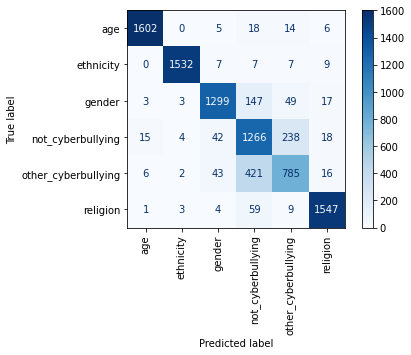

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=catboost_model, X= X_test_2, y_true=y_test_2, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_2, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.98      0.97      0.98      1645
  not_cyberbullying       0.99      0.98      0.99      1562
                age       0.93      0.86      0.89      1518
           religion       0.66      0.80      0.72      1583
          ethnicity       0.71      0.62      0.66      1273
             gender       0.96      0.95      0.96      1623

           accuracy                           0.87      9204
          macro avg       0.87      0.86      0.87      9204
       weighted avg       0.88      0.87      0.87      9204



## Word2Vec

In [ ]:
pip install gensim==4.0.0

     |████████████████████████████████| 23.9 MB 1.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# https://www.kaggle.com/ananyabioinfo/text-classification-using-word2vec

###CBOW

In [ ]:
from gensim.models import TfidfModel
import gensim

In [ ]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

In [ ]:
# downloading stopwords list
nltk_download('stopwords')
stop = stopwords.words('english')

#ADJUSTING DATA FORMAT

#Putting all tweets in a lower case format
data['tweet_token'] = data['tweet_text'].str.lower()

#Removing numbers and punctuations
data['tweet_token'] = data['tweet_token'].apply(lambda x: re.sub(r'[!$(),\n“%^*?:;.&~"`0-9]', '', x))
data['tweet_token'] = data['tweet_token'].apply(lambda x: re.sub(r'[[]]', '', x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tweet_token = []
for i, sent in enumerate(data.tweet_token):
    token = tweet_tokenizer.tokenize(sent)
    token = [word for word in token if word not in stop]
    data["tweet_token"].iloc[i] = token
    tweet_token.append(token)

In [ ]:
data

,tweet_text,cyberbullying_type,char_count,word_count,capital_char_count,capital_word_count,punctuation_count,count_words_in_quotes,Number_of_sentences,Unique_words,...,number_of_mentions,Number_of_stopwords,avg_sentlength,unique_vs_words,stopwords_vs_words,tweet_text_clean,tweet_clean_stopword_removed,tweet_clean_stopword_removed_Stemmed,target,tweet_token
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,61,9,1,0,3,0,1,9,...,0,3,9.0,1.000000,0.333333,in other words katandandre your food was crapilicious mkr,word katandandre food crapilicious mkr,word katandandr food crapilici mkr,3,"[words, #katandandre, food, crapilicious, #mkr]"
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying,115,14,12,1,2,0,1,14,...,0,2,14.0,1.000000,0.142857,why is aussietv so white mkr theblock imacelebrityau today sunrise studio neighbours wonderlandten etc,aussietv white mkr theblock imacelebrityau today sunrise studio neighbour wonderlandten etc,aussietv white mkr theblock imacelebrityau today sunris studio neighbour wonderlandten etc,3,"[#aussietv, white, #mkr, #theblock, #imacelebrityau, #today, #sunrise, #studio, #neighbours, #wonderlandten, #etc]"
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,60,9,3,0,2,0,1,9,...,1,2,9.0,1.000000,0.222222,xochitlsuckkks a classy whore or more red velvet cupcakes,xochitlsuckkks classy whore red velvet cupcakes,xochitlsuckkk classi whore red velvet cupcak,3,"[@xochitlsuckkks, classy, whore, red, velvet, cupcakes]"
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying,103,18,3,1,5,0,2,18,...,1,8,9.0,1.000000,0.444444,jason_gio meh. p thanks for the heads up but not too concerned about another angry dude on twitter.,jason_gio meh . p thank head concern another angry dude twitter .,jason_gio meh . p thank head concern anoth angri dude twitter .,3,"[@jason_gio, meh, p, thanks, heads, concerned, another, angry, dude, twitter]"
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying,103,18,10,1,3,0,2,17,...,1,8,9.0,0.944444,0.444444,rudhoeenglish this is an isis account pretending to be a kurdish account. like islam it is all lies.,rudhoeenglish isis account pretend kurdish account . like islam lie .,rudhoeenglish isi account pretend kurdish account . like islam lie .,3,"[@rudhoeenglish, isis, account, pretending, kurdish, account, like, islam, lies]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will ...",ethnicity,234,42,3,0,3,0,3,36,...,0,20,14.0,0.857143,0.476190,black ppl aren't expected to do anything depended on for anything. yet free to participate work enjoy the freedom of humans all across this globe. if you waste your energy on the past you will ...,black ppl expect anything depend anything . yet free participate work enjoy freedom humans across globe . waste energy past waste build future .,black ppl expect anyth depend anyth . yet free particip work enjoy freedom human across globe . wast energi past wast build futur .,1,"[black, ppl, expected, anything, depended, anything, yet, free, participate, work, enjoy, freedom, humans, across, globe, waste, energy, past, wasting, building, future]"
47688,Turner did not withhold his disappointment. Turner called the court an “abominable conclave of negro hating demons” (with one exception) who “issued another decree that colored men and women must ...,ethnicity,276,45,4,0,3,0,2,42,...,0,16,22.5,0.933333,0.355556,turner did not withhold his disappointment. turner called the court an “abominable conclave of negro hating demons” with one excepti

In [ ]:
from gensim.models import Word2Vec, Phrases

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
model_cbow = Word2Vec(sentences = data['tweet_token'], vector_size = 100, min_count = 0, window = 5, workers = 2, sg = 0)

In [ ]:
def vectorize_data(data, vocab: dict) -> list:
    print('Vectorize sentences...', end='\r')
    keys = list(vocab.keys())
    filter_unknown = lambda word: vocab.get(word, None) is not None
    encode = lambda review: list(map(keys.index, filter(filter_unknown, review)))
    vectorized = list(map(encode, data))
    print('Vectorize sentences... (done)')
    return vectorized

In [ ]:
X_data = tweet_token
input_length = 100
X_pad = pad_sequences(
    sequences=vectorize_data(X_data, vocab=model_cbow.wv.key_to_index),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')

Vectorize sentences... (done)
Transform sentences to sequences... (done)


In [ ]:
X = X_pad
y = data.cyberbullying_type.values

#### Random Forest

In [ ]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=.2, random_state=555)

print(f"X train data has shape {X_train_3.shape} and their label's shape {y_train_3.shape}")
print(f"X test data has shape {X_test_3.shape} and their label's shape {y_test_3.shape}")

X train data has shape (36813, 100) and their label's shape (36813,)
X test data has shape (9204, 100) and their label's shape (9204,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train_3, y_train_3)

RandomForestClassifier(random_state=555)

In [ ]:
from sklearn.metrics import f1_score
y_pred = rf.predict(X_test_3)
print('F1_score : %f' %(f1_score(y_pred, y_test_3, average = 'micro')))

F1_score : 0.686441


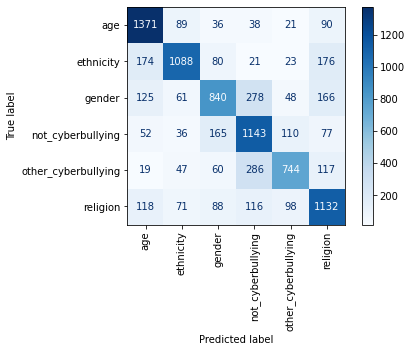

In [ ]:
plot_confusion_matrix(estimator=rf, X= X_test_3, y_true=y_test_3, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_3, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.80      0.77      0.79      1645
  not_cyberbullying       0.86      0.72      0.78      1562
                age       0.72      0.55      0.63      1518
           religion       0.54      0.83      0.65      1583
          ethnicity       0.85      0.52      0.64      1273
             gender       0.63      0.76      0.69      1623

           accuracy                           0.70      9204
          macro avg       0.73      0.69      0.70      9204
       weighted avg       0.73      0.70      0.70      9204



In [ ]:
import pickle
def train_CBOW(model_n, model, X_train, y_train, X_test, y_test):

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  f1 = f1_score(y_pred, y_test,average = 'micro')
  print(model_n)
  print('F1_score ((Using CBOW technique)) : %f' %(f1))
  print('Accuracy_score of ((Using CBOW technique)) : %f'  %(accuracy_score(y_test, y_pred)))

  print('\n------------------------------------------')
  print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))
  plot_confusion_matrix(estimator=model, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

  pickle.dump(model,open("/content/drive/MyDrive/Colab Notebooks/20_Ensemble_Learning/Project/models/" + model_n +".pkl",'wb'))
 

####Decision Tree

DecisionTree_CBOW
F1_score ((Using CBOW technique)) : 0.591808
Accuracy_score of ((Using CBOW technique)) : 0.591808

------------------------------------------
                     precision    recall  f1-score   support

other_cyberbullying       0.72      0.70      0.71      1645
                age       0.66      0.69      0.67      1562
           religion       0.52      0.54      0.53      1518
             gender       0.53      0.50      0.52      1583
  not_cyberbullying       0.57      0.57      0.57      1273
          ethnicity       0.54      0.54      0.54      1623

           accuracy                           0.59      9204
          macro avg       0.59      0.59      0.59      9204
       weighted avg       0.59      0.59      0.59      9204



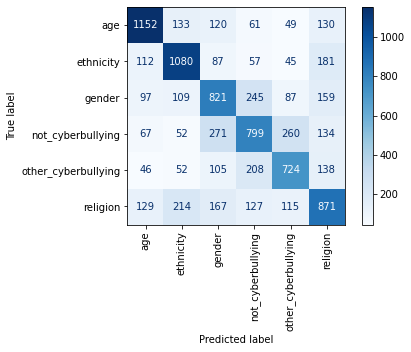

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

train_CBOW("DecisionTree_CBOW", dt, X_train_3, y_train_3, X_test_3, y_test_3)

####GradientBoosting

GradientBoosting_CBOW
F1_score ((Using CBOW technique)) : 0.735984
Accuracy_score of ((Using CBOW technique)) : 0.735984

------------------------------------------
                     precision    recall  f1-score   support

other_cyberbullying       0.85      0.83      0.84      1645
                age       0.87      0.78      0.82      1562
           religion       0.73      0.61      0.66      1518
             gender       0.57      0.82      0.67      1583
  not_cyberbullying       0.82      0.56      0.67      1273
          ethnicity       0.70      0.78      0.74      1623

           accuracy                           0.74      9204
          macro avg       0.76      0.73      0.73      9204
       weighted avg       0.76      0.74      0.74      9204



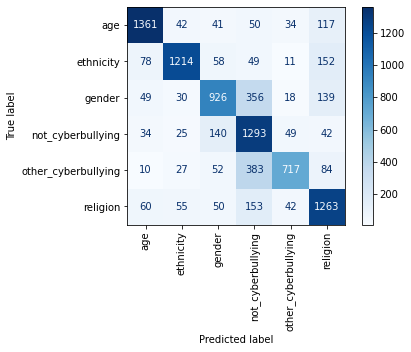

In [ ]:
gb = GradientBoostingClassifier(random_state=42)

train_CBOW("GradientBoosting_CBOW", gb, X_train_3, y_train_3, X_test_3, y_test_3)

####LightGBM

In [ ]:
X_clean_train_CBOW_LGBM =X_train_3.astype('float32')
X_clean_test_CBOW_LGBM = X_test_3.astype('float32')

LightGBM_CBOW
F1_score ((Using CBOW technique)) : 0.802260
Accuracy_score of ((Using CBOW technique)) : 0.802260

------------------------------------------
                     precision    recall  f1-score   support

other_cyberbullying       0.91      0.93      0.92      1645
                age       0.93      0.86      0.89      1562
           religion       0.83      0.69      0.75      1518
             gender       0.62      0.81      0.71      1583
  not_cyberbullying       0.77      0.65      0.71      1273
          ethnicity       0.80      0.84      0.82      1623

           accuracy                           0.80      9204
          macro avg       0.81      0.80      0.80      9204
       weighted avg       0.81      0.80      0.80      9204



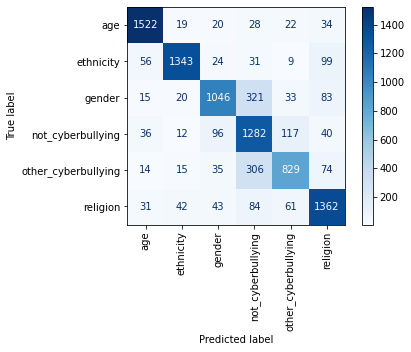

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)

train_CBOW("LightGBM_CBOW", lgb, X_clean_train_CBOW_LGBM, y_train_3, X_clean_test_CBOW_LGBM, y_test_3)

#### XGboost

In [ ]:
model = XGBClassifier(objective = 'multi:softmax')
xgboost_model = model.fit(X_train_3, y_train_3)
y_pred = xgboost_model.predict(X_test_3)

In [ ]:
print('F1_score of XGBoost((Using CBOW)) : %f' %(f1_score(y_pred, y_test_3, average = 'micro')))

F1_score of XGBoost((Using CBOW)) : 0.697957


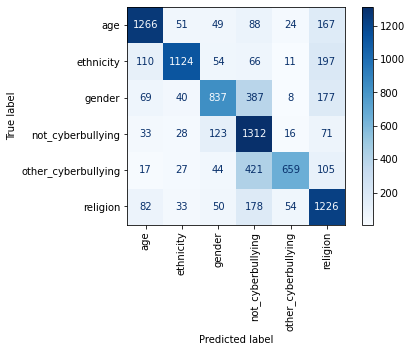

In [ ]:
plot_confusion_matrix(estimator=xgboost_model, X= X_test_3, y_true=y_test_3, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_3, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

                age       0.80      0.77      0.79      1645
             gender       0.86      0.72      0.78      1562
           religion       0.72      0.55      0.63      1518
  not_cyberbullying       0.54      0.83      0.65      1583
          ethnicity       0.85      0.52      0.64      1273
other_cyberbullying       0.63      0.76      0.69      1623

           accuracy                           0.70      9204
          macro avg       0.73      0.69      0.70      9204
       weighted avg       0.73      0.70      0.70      9204



#### Adaboost

In [ ]:
model = AdaBoostClassifier(learning_rate=1)
adaboost_model = model.fit(X_train_3, y_train_3)

#Predict
y_pred = adaboost_model.predict(X_test_3)

In [ ]:
print('F1_score of AdaBoost((Using CBOW)) : %f' %(f1_score(y_pred, y_test_3, average = 'micro')))
print('Accuracy_score of AdaBoost((Using CBOW)) : %f'  %(accuracy_score(y_test_3, y_pred)))

F1_score of AdaBoost((Using CBOW)) : 0.464255
Accuracy_score of AdaBoost((Using CBOW)) : 0.464255


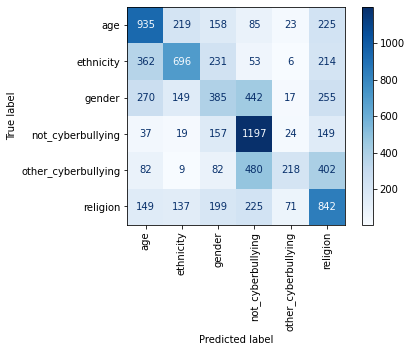

In [ ]:
#Clean_Text

plot_confusion_matrix(estimator=adaboost_model, X= X_test_3, y_true=y_test_3, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
#Clean Text
print(classification_report(y_test_3, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.51      0.57      0.54      1645
  not_cyberbullying       0.57      0.45      0.50      1562
                age       0.32      0.25      0.28      1518
           religion       0.48      0.76      0.59      1583
          ethnicity       0.61      0.17      0.27      1273
             gender       0.40      0.52      0.45      1623

           accuracy                           0.46      9204
          macro avg       0.48      0.45      0.44      9204
       weighted avg       0.48      0.46      0.45      9204



#### Catboost

In [ ]:
model = CatBoostClassifier()
catboost_model = model.fit(X_train_3, y_train_3)

#Predict
y_pred = catboost_model.predict(X_test_3)

Learning rate set to 0.095102
0:	learn: 1.7376843	total: 180ms	remaining: 2m 59s
1:	learn: 1.6951874	total: 338ms	remaining: 2m 48s
2:	learn: 1.6602609	total: 491ms	remaining: 2m 43s
3:	learn: 1.6294453	total: 644ms	remaining: 2m 40s
4:	learn: 1.5999252	total: 803ms	remaining: 2m 39s
5:	learn: 1.5743577	total: 955ms	remaining: 2m 38s
6:	learn: 1.5498881	total: 1.11s	remaining: 2m 37s
7:	learn: 1.5292993	total: 1.28s	remaining: 2m 39s
8:	learn: 1.5105275	total: 1.45s	remaining: 2m 39s
9:	learn: 1.4932779	total: 1.61s	remaining: 2m 39s
10:	learn: 1.4781687	total: 1.77s	remaining: 2m 39s
11:	learn: 1.4652683	total: 1.91s	remaining: 2m 37s
12:	learn: 1.4509725	total: 2.06s	remaining: 2m 36s
13:	learn: 1.4369026	total: 2.23s	remaining: 2m 37s
14:	learn: 1.4251068	total: 2.37s	remaining: 2m 35s
15:	learn: 1.4127717	total: 2.51s	remaining: 2m 34s
16:	learn: 1.3985700	total: 2.67s	remaining: 2m 34s
17:	learn: 1.3874691	total: 2.88s	remaining: 2m 37s
18:	learn: 1.3778883	total: 3.01s	remaining:

In [ ]:
#Clean Text
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of CatBoost((Using CBOW)) : %f' %(f1_score(y_pred, y_test_3, average = 'micro')))
print('Accuracy_score of CatBoost((Using CBOW)) : %f'  %(accuracy_score(y_test_3, y_pred)))

F1_score of CatBoost((Using CBOW)) : 0.804650
Accuracy_score of CatBoost((Using CBOW)) : 0.804650


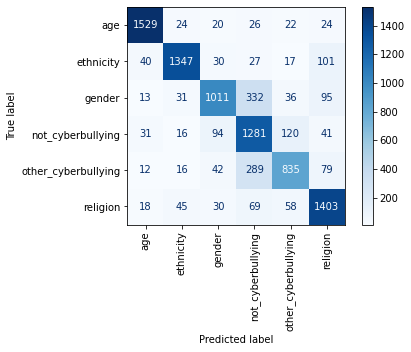

In [ ]:
#Clean_Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=catboost_model, X= X_test_3, y_true=y_test_3, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_3, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.93      0.93      0.93      1645
  not_cyberbullying       0.91      0.86      0.89      1562
                age       0.82      0.67      0.74      1518
           religion       0.63      0.81      0.71      1583
          ethnicity       0.77      0.66      0.71      1273
             gender       0.80      0.86      0.83      1623

           accuracy                           0.80      9204
          macro avg       0.81      0.80      0.80      9204
       weighted avg       0.81      0.80      0.81      9204



### Skipgram

In [ ]:
from gensim.models import Word2Vec, Phrases

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
model_SG = Word2Vec(sentences = data['tweet_token'], vector_size = 300, min_count = 0, window = 10, workers = 2, sg = 1)

In [ ]:
def vectorize_data(data, vocab: dict) -> list:
    print('Vectorize sentences...', end='\r')
    keys = list(vocab.keys())
    filter_unknown = lambda word: vocab.get(word, None) is not None
    encode = lambda review: list(map(keys.index, filter(filter_unknown, review)))
    vectorized = list(map(encode, data))
    print('Vectorize sentences... (done)')
    return vectorized

In [ ]:
X_data = tweet_token
input_length = 300
X_pad_SG = pad_sequences(
    sequences=vectorize_data(X_data, vocab=model_SG.wv.key_to_index),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')

Vectorize sentences... (done)
Transform sentences to sequences... (done)


In [ ]:
X = X_pad_SG
y = data.cyberbullying_type.values

In [ ]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=.2, random_state=555)

print(f"X train data has shape {X_train_4.shape} and their label's shape {y_train_4.shape}")
print(f"X test data has shape {X_test_4.shape} and their label's shape {y_test_4.shape}")

X train data has shape (36813, 300) and their label's shape (36813,)
X test data has shape (9204, 300) and their label's shape (9204,)


#### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train_4, y_train_4)

RandomForestClassifier(random_state=555)

In [ ]:
y_pred = rf.predict(X_test_4)
print('F1_score : %f' %(f1_score(y_pred, y_test_4, average = 'micro')))

F1_score : 0.672534


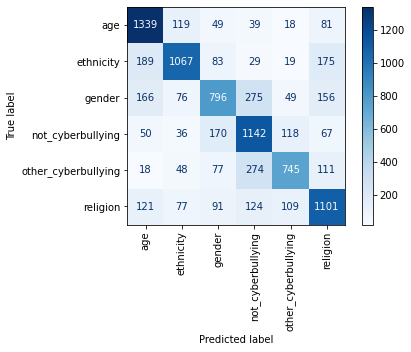

In [ ]:
plot_confusion_matrix(estimator=rf, X= X_test_4, y_true=y_test_4, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_4, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

                age       0.93      0.93      0.93      1645
             gender       0.92      0.87      0.89      1562
           religion       0.82      0.68      0.74      1518
  not_cyberbullying       0.63      0.81      0.71      1583
          ethnicity       0.77      0.65      0.70      1273
other_cyberbullying       0.81      0.86      0.83      1623

           accuracy                           0.81      9204
          macro avg       0.81      0.80      0.80      9204
       weighted avg       0.81      0.81      0.81      9204



In [ ]:
def train_SG(model_n, model, X_train, y_train, X_test, y_test):

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  f1 = f1_score(y_pred, y_test,average = 'micro')
  print(model_n)
  print('F1_score ((Using SkipGram of words technique)) : %f' %(f1))
  print('Accuracy_score of SG((Using SkipGram technique)) : %f'  %(accuracy_score(y_test, y_pred)))

  print('\n------------------------------------------')
  print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))
  plot_confusion_matrix(estimator=model, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

  pickle.dump(model,open("/content/drive/MyDrive/Colab Notebooks/20_Ensemble_Learning/Project/models/" + model_n +".pkl",'wb'))
 

####Decision Tree

DecisionTree_SG
F1_score ((Using SkipGram of words technique)) : 0.588548
Accuracy_score of SG((Using SkipGram technique)) : 0.588548

------------------------------------------
                     precision    recall  f1-score   support

other_cyberbullying       0.72      0.69      0.70      1645
                age       0.65      0.69      0.67      1562
           religion       0.51      0.54      0.52      1518
             gender       0.53      0.50      0.52      1583
  not_cyberbullying       0.56      0.57      0.57      1273
          ethnicity       0.54      0.54      0.54      1623

           accuracy                           0.59      9204
          macro avg       0.59      0.59      0.59      9204
       weighted avg       0.59      0.59      0.59      9204



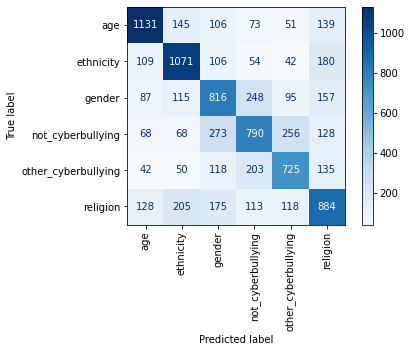

In [ ]:
#from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

train_SG("DecisionTree_SG", dt, X_train_4, y_train_4, X_test_4, y_test_4)

####GradientBoosting

GradientBoosting_SG
F1_score ((Using SkipGram of words technique)) : 0.735876
Accuracy_score of SG((Using SkipGram technique)) : 0.735876

------------------------------------------
                     precision    recall  f1-score   support

other_cyberbullying       0.87      0.83      0.85      1645
                age       0.87      0.77      0.82      1562
           religion       0.73      0.62      0.67      1518
             gender       0.57      0.82      0.67      1583
  not_cyberbullying       0.82      0.57      0.67      1273
          ethnicity       0.70      0.77      0.73      1623

           accuracy                           0.74      9204
          macro avg       0.76      0.73      0.73      9204
       weighted avg       0.76      0.74      0.74      9204



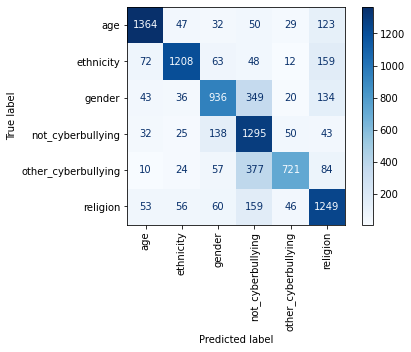

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

train_SG("GradientBoosting_SG", gb, X_train_4, y_train_4, X_test_4, y_test_4)

####LightGBM

In [ ]:
X_clean_train_SG_LGBM =X_train_4.astype('float32')
X_clean_test_SG_LGBM = X_test_4.astype('float32')

LightGBM_SG
F1_score ((Using SkipGram of words technique)) : 0.800956
Accuracy_score of SG((Using SkipGram technique)) : 0.800956

------------------------------------------
                     precision    recall  f1-score   support

other_cyberbullying       0.90      0.92      0.91      1645
                age       0.92      0.86      0.89      1562
           religion       0.82      0.69      0.75      1518
             gender       0.63      0.80      0.70      1583
  not_cyberbullying       0.77      0.66      0.71      1273
          ethnicity       0.81      0.84      0.82      1623

           accuracy                           0.80      9204
          macro avg       0.81      0.79      0.80      9204
       weighted avg       0.81      0.80      0.80      9204



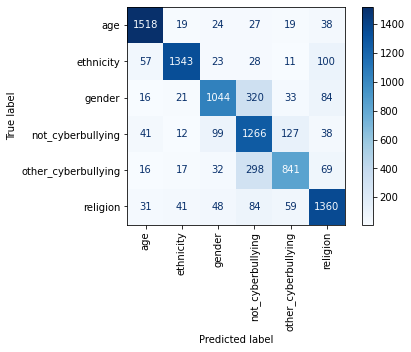

In [ ]:
#from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)

train_SG("LightGBM_SG", lgb, X_clean_train_SG_LGBM, y_train_4, X_clean_test_SG_LGBM, y_test_4)

#### Xgboost

In [ ]:
#Xgboost
model = XGBClassifier(objective = 'multi:softmax')

# make predictions using xgboost for classification
# fit the model on the whole dataset
xgboost_model = model.fit(X_train_4, y_train_4)

#Predict
y_pred = xgboost_model.predict(X_test_4)

In [ ]:
print('F1_score of XGBoost((Using Skipgram)) : %f' %(f1_score(y_pred, y_test_4, average = 'micro')))

F1_score of XGBoost((Using Skipgram)) : 0.695676


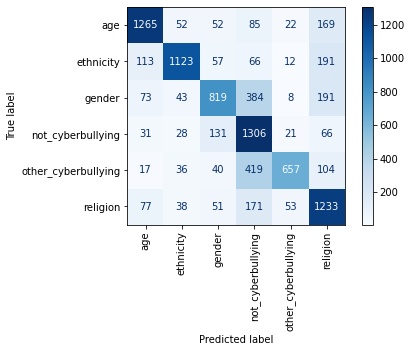

In [ ]:
plot_confusion_matrix(estimator=xgboost_model, X= X_test_4, y_true=y_test_4, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_4, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

                age       0.80      0.77      0.79      1645
             gender       0.85      0.72      0.78      1562
           religion       0.71      0.54      0.61      1518
  not_cyberbullying       0.54      0.83      0.65      1583
          ethnicity       0.85      0.52      0.64      1273
other_cyberbullying       0.63      0.76      0.69      1623

           accuracy                           0.70      9204
          macro avg       0.73      0.69      0.69      9204
       weighted avg       0.73      0.70      0.70      9204



#### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(learning_rate=1)
adaboost_model = model.fit(X_train_4, y_train_4)

#Predict
y_pred = adaboost_model.predict(X_test_4)

In [ ]:
#Clean Text
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of AdaBoost((Using Skipgram)) : %f' %(f1_score(y_pred, y_test_4, average = 'micro')))
print('Accuracy_score of AdaBoost((Using Skipgram)) : %f'  %(accuracy_score(y_test_3, y_pred)))

F1_score of AdaBoost((Using Skipgram)) : 0.460561
Accuracy_score of AdaBoost((Using Skipgram)) : 0.460561


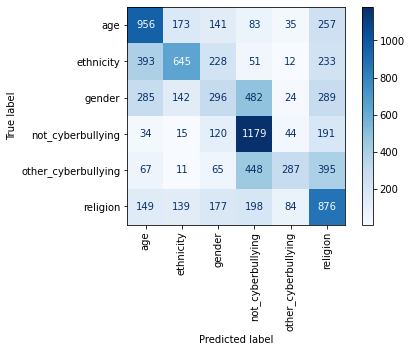

In [ ]:
#Clean_Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=adaboost_model, X= X_test_4, y_true=y_test_4, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_4, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

                age       0.51      0.58      0.54      1645
             gender       0.57      0.41      0.48      1562
           religion       0.29      0.19      0.23      1518
  not_cyberbullying       0.48      0.74      0.59      1583
          ethnicity       0.59      0.23      0.33      1273
other_cyberbullying       0.39      0.54      0.45      1623

           accuracy                           0.46      9204
          macro avg       0.47      0.45      0.44      9204
       weighted avg       0.47      0.46      0.44      9204



#### Catboost

In [ ]:
model = CatBoostClassifier()
catboost_model = model.fit(X_train_4, y_train_4)

#Predict
y_pred = catboost_model.predict(X_test_4)

Learning rate set to 0.095102
0:	learn: 1.7406798	total: 511ms	remaining: 8m 30s
1:	learn: 1.6975826	total: 841ms	remaining: 6m 59s
2:	learn: 1.6615778	total: 1.19s	remaining: 6m 34s
3:	learn: 1.6268917	total: 1.54s	remaining: 6m 23s
4:	learn: 1.6000505	total: 1.88s	remaining: 6m 14s
5:	learn: 1.5713456	total: 2.25s	remaining: 6m 11s
6:	learn: 1.5497263	total: 2.62s	remaining: 6m 11s
7:	learn: 1.5320588	total: 2.97s	remaining: 6m 8s
8:	learn: 1.5122297	total: 3.33s	remaining: 6m 6s
9:	learn: 1.4941323	total: 3.63s	remaining: 5m 59s
10:	learn: 1.4771683	total: 3.96s	remaining: 5m 55s
11:	learn: 1.4601598	total: 4.3s	remaining: 5m 54s
12:	learn: 1.4482489	total: 4.73s	remaining: 5m 59s
13:	learn: 1.4335514	total: 5.06s	remaining: 5m 56s
14:	learn: 1.4220926	total: 5.36s	remaining: 5m 52s
15:	learn: 1.4129224	total: 5.65s	remaining: 5m 47s
16:	learn: 1.4015530	total: 5.93s	remaining: 5m 43s
17:	learn: 1.3898422	total: 6.3s	remaining: 5m 43s
18:	learn: 1.3799258	total: 6.66s	remaining: 5m 

In [ ]:
#Clean Text
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of CatBoost((Using Skipgram)) : %f' %(f1_score(y_pred, y_test_4, average = 'micro')))
print('Accuracy_score of CatBoost((Using Skipgram)) : %f'  %(accuracy_score(y_test_4, y_pred)))

F1_score of CatBoost((Using Skipgram)) : 0.805737
Accuracy_score of CatBoost((Using Skipgram)) : 0.805737


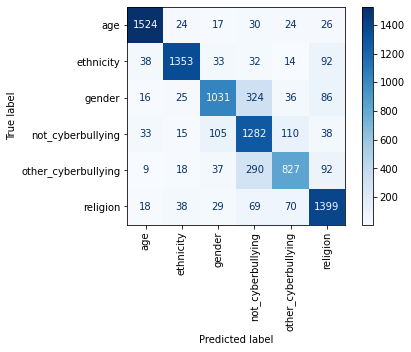

In [ ]:
#Clean_Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=catboost_model, X= X_test_4, y_true=y_test_4, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_4, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

                age       0.93      0.93      0.93      1645
             gender       0.92      0.87      0.89      1562
           religion       0.82      0.68      0.74      1518
  not_cyberbullying       0.63      0.81      0.71      1583
          ethnicity       0.77      0.65      0.70      1273
other_cyberbullying       0.81      0.86      0.83      1623

           accuracy                           0.81      9204
          macro avg       0.81      0.80      0.80      9204
       weighted avg       0.81      0.81      0.81      9204




#Hyperparameter Tuning

## LightGBM

### Bag of words

In [ ]:
# from scipy.stats import randint as sp_randint
# from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': [34, 37], 
             'min_child_samples': [20, 25], 
             'min_child_weight': [1e-3, 1e-2],
             'reg_alpha': [0, 1e-1],
             'reg_lambda': [0, 1e-1]}


#              'feature_fraction': sp_uniform(loc=0.2, scale=0.8), 
#              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
#X_clean_train_CV_LGBM

In [ ]:

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=42, n_estimators=100)
gs_CV = GridSearchCV(
    estimator=clf, param_grid=param_test, 
    scoring="f1_micro",
    cv = 3,
    refit=True,
    verbose=True)

In [ ]:
gs_CV.fit(X_clean_train_CV_LGBM, y_clean_train_CV)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42),
             param_grid={'min_child_samples': [20, 25],
                         'min_child_weight': [0.001, 0.01],
                         'num_leaves': [34, 37], 'reg_alpha': [0, 0.1],
                         'reg_lambda': [0, 0.1]},
             scoring='f1_micro', verbose=True)

In [ ]:
print(gs_CV.best_params_)

grid_predictions_CV = gs_CV.predict(X_clean_test_CV_LGBM) 
   
# print classification report 
print(classification_report(y_clean_test_CV, grid_predictions_CV)) 

from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of LightGBM((Using TF-IDF)) : %f' %(f1_score(grid_predictions_CV, y_clean_test_CV, average = 'micro')))
print('Accuracy_score of LightGBM((Using TF-IDF)) : %f'  %(accuracy_score(y_clean_test_CV, grid_predictions_CV)))

{'min_child_samples': 20, 'min_child_weight': 0.001, 'num_leaves': 34, 'reg_alpha': 0, 'reg_lambda': 0}
                     precision    recall  f1-score   support

                age       0.99      0.97      0.98      1645
          ethnicity       0.99      0.99      0.99      1562
             gender       0.91      0.86      0.88      1518
  not_cyberbullying       0.66      0.70      0.68      1583
other_cyberbullying       0.65      0.68      0.67      1273
           religion       0.97      0.95      0.96      1623

           accuracy                           0.86      9204
          macro avg       0.86      0.86      0.86      9204
       weighted avg       0.87      0.86      0.87      9204

F1_score of LightGBM((Using TF-IDF)) : 0.864950
Accuracy_score of LightGBM((Using TF-IDF)) : 0.864950


### TF-IDF

In [ ]:

param_test ={'num_leaves': [34, 37], 
             'min_child_samples': [20, 25], 
             'min_child_weight': [1e-3, 1e-2],
             'reg_alpha': [0, 1e-1],
             'reg_lambda': [0, 1e-1]}


In [ ]:

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


clf = lgb.LGBMClassifier(max_depth=-1, random_state=42, n_estimators=100)
gs = GridSearchCV(
    estimator=clf, param_grid=param_test, 
    scoring="f1_micro",
    cv = 3,
    refit=True,
    verbose=True)

In [ ]:
gs.fit(X_clean_train_TF_LGBM, y_train_2)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42),
             param_grid={'min_child_samples': [20, 25],
                         'min_child_weight': [0.001, 0.01],
                         'num_leaves': [34, 37], 'reg_alpha': [0, 0.1],
                         'reg_lambda': [0, 0.1]},
             scoring='f1_micro', verbose=True)

In [ ]:
gs.best_params_

{'min_child_samples': 20,
 'min_child_weight': 0.001,
 'num_leaves': 34,
 'reg_alpha': 0.1,
 'reg_lambda': 0}

In [ ]:
grid_predictions = gs.predict(X_clean_test_TF_LGBM) 
   
# print classification report 
print(classification_report(y_test_2, grid_predictions)) 

                     precision    recall  f1-score   support

                age       0.99      0.97      0.98      1645
          ethnicity       0.99      0.99      0.99      1562
             gender       0.92      0.88      0.90      1518
  not_cyberbullying       0.68      0.77      0.72      1583
other_cyberbullying       0.71      0.65      0.68      1273
           religion       0.98      0.97      0.97      1623

           accuracy                           0.88      9204
          macro avg       0.88      0.87      0.87      9204
       weighted avg       0.88      0.88      0.88      9204



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of LightGBM((Using TF-IDF)) : %f' %(f1_score(grid_predictions, y_test_2, average = 'micro')))
print('Accuracy_score of LightGBM((Using TF-IDF)) : %f'  %(accuracy_score(y_test_2, grid_predictions)))

F1_score of LightGBM((Using TF-IDF)) : 0.880052
Accuracy_score of LightGBM((Using TF-IDF)) : 0.880052


## Xgboost


### Bag of words 

In [ ]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(X_train, y_train), (X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=10,verbose=False)
    pred= clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)

    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.1612328336303596
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16291015829751546
SCORE:
0.1612328336303596
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.1612328336303596
SCORE:
0.16427298458957962
SCORE:
0.16311982388090995
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.1612328336303596
SCORE

In [ ]:
# define the model
model = XGBClassifier(objective = 'multi:softmax',colsample_bytree= 0.5163471408413387, gamma =3.831493253976012, max_depth = 5, min_child_weight =6, reg_alpha= 123, reg_lambda= 0.5290142286731677)

# make predictions using xgboost for classification
# fit the model on the whole dataset
xgboost_model = model.fit(X_train, y_train)

#Predict
y_pred = xgboost_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of XGBoost((Using Bag of words technique)) : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))
print('Accuracy_score of XGBoost((Using Bag of words technique)) : %f'  %(accuracy_score(y_test, y_pred)))

F1_score of XGBoost((Using Bag of words technique)) : 0.798511
Accuracy_score of XGBoost((Using Bag of words technique)) : 0.798511


### TF-IDF

In [ ]:
def objective2(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(X_train_2, y_train_2), (X_test_2, y_test_2)]
    
    clf.fit(X_train_2, y_train_2,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=10,verbose=False)
    pred= clf.predict(X_test_2)
    accuracy = accuracy_score(y_test_2,pred)

    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective2,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 20,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.25767900199182303
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.2626061432015935
SCORE:
0.23545445015200756
SCORE:
0.2578886675752175
SCORE:
0.2548485166159975
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
100%|██████████| 20/20 [33:32<00:00, 100.62s/it, best loss: -0.2626061432015935]
The best hyperparameters are :  

{'colsample_bytree': 0.9308781563799851, 'gamma': 1.9365290511369784, 'max_depth': 5.0, 'min_child_weight': 7.0, 'reg_alpha': 43.0, 'reg_lambda': 0.9710120546082042}


In [ ]:
# define the model
model_2 = XGBClassifier(objective = 'multi:softmax',colsample_bytree= 0.9308781563799851, gamma =1.9365290511369784, max_depth = 5, min_child_weight =7, reg_alpha= 43, reg_lambda= 0.9710120546082042)

# make predictions using xgboost for classification
# fit the model on the whole dataset
xgboost_model_2 = model_2.fit(X_train_2, y_train_2)

#Predict
y_pred_2 = xgboost_model_2.predict(X_test_2)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of XGBoost((Using TF-IDF)) : %f' %(f1_score(y_pred_2, y_test_2, average = 'micro')))
print('Accuracy_score of XGBoost((Using TF-IDF)) : %f'  %(accuracy_score(y_test_2, y_pred_2)))

F1_score : 0.807212


##CatBoost

### Bag of words

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
from scipy.stats import randint

You should consider upgrading via the '/Users/prajwallohan/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [ ]:
model = CatBoostClassifier()
# define the grid of values to search
grid = dict()
grid['learning_rate'] = [0.001, 0.01, 0.1]
grid['max_depth'] = [4,6,8]
grid['iterations'] = [40]
grid['l2_leaf_reg'] = [3,5,10]


# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train,y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
   print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.816061 using {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'max_depth': 8}
0.630918 (0.007302) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.001, 'max_depth': 4}
0.674028 (0.008261) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.001, 'max_depth': 6}
0.716558 (0.008688) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.001, 'max_depth': 8}
0.631452 (0.007282) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.01, 'max_depth': 4}
0.694591 (0.007461) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.01, 'max_depth': 6}
0.726754 (0.005003) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.01, 'max_depth': 8}
0.775704 (0.006094) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'max_depth': 4}
0.803267 (0.005180) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'max_depth': 6}
0.816061 (0.005217) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'm

In [ ]:
# elapsed = end - start
# print("time taken: ", time.strftime("%Hh %Mm %Ss", time.gmtime(elapsed)))

time taken:  08h 26m 09s


In [ ]:
#With Hyperparameters
!pip install catboost
from catboost import CatBoostClassifier
from scipy.stats import randint

model = CatBoostClassifier(iterations= 40,learning_rate= 0.1,max_depth= 8)
catboost_model = model.fit(X_train, y_train)

#Predict
y_pred = catboost_model.predict(X_test)

0:	learn: 1.5163942	total: 2.6s	remaining: 43m 21s
1:	learn: 1.3585355	total: 5.25s	remaining: 43m 38s
2:	learn: 1.2385730	total: 8.65s	remaining: 47m 53s
3:	learn: 1.1455928	total: 11.3s	remaining: 46m 41s
4:	learn: 1.0691555	total: 13.9s	remaining: 45m 59s
5:	learn: 1.0036025	total: 16.4s	remaining: 45m 14s
6:	learn: 0.9497308	total: 19s	remaining: 44m 52s
7:	learn: 0.9036526	total: 21.6s	remaining: 44m 34s
8:	learn: 0.8607012	total: 24.2s	remaining: 44m 19s
9:	learn: 0.8265945	total: 26.7s	remaining: 44m 5s
10:	learn: 0.7945348	total: 29.3s	remaining: 43m 52s
11:	learn: 0.7679699	total: 31.9s	remaining: 43m 43s
12:	learn: 0.7419789	total: 34.5s	remaining: 43m 35s
13:	learn: 0.7191286	total: 37.1s	remaining: 43m 30s
14:	learn: 0.6993739	total: 39.6s	remaining: 43m 23s
15:	learn: 0.6807919	total: 42.3s	remaining: 43m 23s
16:	learn: 0.6624165	total: 44.9s	remaining: 43m 18s
17:	learn: 0.6485562	total: 47.6s	remaining: 43m 16s
18:	learn: 0.6351201	total: 50.2s	remaining: 43m 10s
19:	lea

In [ ]:
print('F1_score of CatBoost((Using Hyperparameters)) : %f' %(f1_score(y_pred, y_test, average = 'micro')))

F1_score of CatBoost((Using Hyperparameters)) : 0.859626


### TF-IDF

In [ ]:
model = CatBoostClassifier()
# define the grid of values to search
grid = dict()
grid['learning_rate'] = [0.01, 0.1]
grid['max_depth'] = [6,8,10]
grid['iterations'] = [40]
grid['l2_leaf_reg'] = [3,5,10]


# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train_2,y_train_2)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
   print("%f (%f) with: %r" % (mean, stdev, param))

##Adaboost

### Bag of words

In [ ]:
#Hyper parameter tuning for Bag of words - Adaboost

model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# define the model

model_ad = AdaBoostClassifier(n_estimators=100,learning_rate=0.001)

# make predictions 

# fit the model on the whole dataset
adaboost_model = model_ad.fit(X_train, y_train)

#Predict
y_pred = adaboost_model.predict(X_test)

In [ ]:

print('F1_score of Adaboost((Using Bag of words)) : %f' %(f1_score(y_pred, y_test, average = 'micro')))
print('Accuracy_score of Adaboost((Using Bag of words)) : %f'  %(accuracy_score(y_test, y_pred)))


##Gradient Boost